In [1]:
import numpy as np
import pandas as pd
import nltk
import json
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

In [2]:
d = {'parent_id':[], 
     'author':[], 
     'distinguished':[], 
     'body':[], 
     'gilded':[], 
     'score':[], 
     'author_flair_css_class':[],
     'stickied':[],
     'retrieved_on':[],
     'author_flair_text':[],
     'id':[],
     'subreddit':[]
    }

In [3]:
reddit_df = pd.DataFrame(data=d)
sample = 100
x=0
with open('../../json_files/Android.txt', 'r') as infile:
    for line in infile:
        if(x<=sample):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Android'
        x=x+1
x=sample

with open('../../json_files/boardgames.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*2)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'boardgames'
        x=x+1
x=sample*2   

with open('../../json_files/Conservative.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*3)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Conservative'
        x=x+1
x=sample*3   

with open('../../json_files/hockey.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*4)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'hockey'
        x=x+1
x=sample*4

with open('../../json_files/Libertarian.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*5)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Libertarian'
        x=x+1
x=sample*5   

with open('../../json_files/neoliberal.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*6)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'neoliberal'
        x=x+1
x=sample*6   

with open('../../json_files/politics.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*7)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'politics'
        x=x+1
x=sample*7   

with open('../../json_files/worldnews.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*8)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'worldnews'
        x=x+1

In [4]:
reddit_df.head()

,author,author_flair_css_class,author_flair_text,body,distinguished,gilded,id,parent_id,retrieved_on,score,stickied,subreddit
0,Worth_The_Squeeze,NaN,NaN,"I know. It's the thing I call the ""Apple spher...",NaN,0.0,dmehp79,t1_dme9izp,1.504557e+09,6.0,False,Android
1,startupreddit,userBlack,Black,I just really hope they keep the quality as it...,NaN,0.0,dmehp7m,t1_dmehj24,1.504557e+09,1.0,False,Android
2,Deksloc,AMA,/r/Android AMA Coordinator,"Sorry HollowmanNapkin, your submission has bee...",moderator,0.0,dmehpbd,t3_6xatxb,1.504557e+09,1.0,False,Android
3,_ALLLLRIGHTY_THEN,None,None,As someone who hasnt used a headphone jack in ...,None,0.0,dmehpd3,t1_dme0181,1.504557e+09,2.0,False,Android
4,the_scam,None,None,I feel that they tend to submit patents for de...,None,0.0,dmehphy,t1_dmefgm7,1.504557e+09,1.0,False,Android


In [5]:
y = reddit_df['subreddit']

In [6]:
reddit_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize)
reddit_counts = reddit_vec.fit_transform(reddit_df['body'])
tfidf_transformer = TfidfTransformer()
reddit_tfidf = tfidf_transformer.fit_transform(reddit_counts)
reddit_tfidf.shape

(801, 3800)

In [7]:
reddit_vec = CountVectorizer(min_df=5, tokenizer=nltk.word_tokenize)
reddit_counts = reddit_vec.fit_transform(reddit_df['body'])
tfidf_transformer = TfidfTransformer()
reddit_tfidf = tfidf_transformer.fit_transform(reddit_counts)
reddit_tfidf.shape

(801, 1391)

In [8]:
X = reddit_tfidf

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
classifier = MultinomialNB().fit(X_train, y_train)
classifier

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.62732919254658381

In [11]:
temp = (y_pred == 'Android')
sum = 0
for x in temp:
    if x == True:
        sum = sum + 1
print("Android: " + str(sum))

temp = (y_pred == 'boardgames')
sum = 0
for x in temp:
    if x == True:
        sum = sum + 1
print("boardgames: " + str(sum))

temp = (y_pred == 'Conservative')
sum = 0
for x in temp:
    if x == True:
        sum = sum + 1
print("Conservative: " + str(sum))

temp = (y_pred == 'hockey')
sum = 0
for x in temp:
    if x == True:
        sum = sum + 1
print("hockey: " + str(sum))

temp = (y_pred == 'Libertarian')
sum = 0
for x in temp:
    if x == True:
        sum = sum + 1
print("Libertarian: " + str(sum))

temp = (y_pred == 'neoliberal')
sum = 0
for x in temp:
    if x == True:
        sum = sum + 1
print("neoliberal: " + str(sum))

temp = (y_pred == 'politics')
sum = 0
for x in temp:
    if x == True:
        sum = sum + 1
print("politics: " + str(sum))

temp = (y_pred == 'worldnews')
sum = 0
for x in temp:
    if x == True:
        sum = sum + 1
print("worldnews: " + str(sum))

Android: 26
boardgames: 24
Conservative: 16
hockey: 15
Libertarian: 13
neoliberal: 25
politics: 25
worldnews: 17


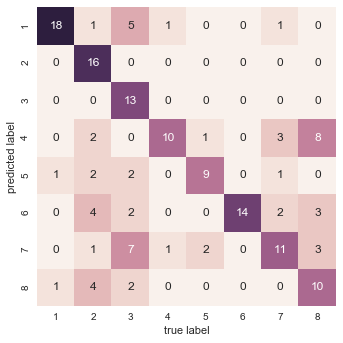

In [12]:
cm = confusion_matrix(y_test, y_pred)
cm

sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[1,2,3,4,5,6,7,8], yticklabels=[1,2,3,4,5,6,7,8])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Adding the rows, I found that 
1 corresponds to Android
2 corresponds to Conservative
3 corresponds to Libertarian
4 corresponds to boardgames
5 corresponds to hockey
6 corresponds to neoliberal
7 corresponds to politics
8 corresponds to worldnews

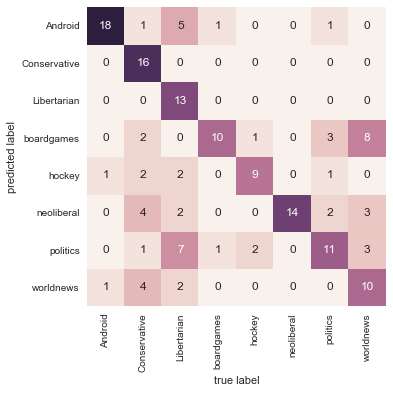

In [13]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'], 
            yticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [14]:
sample = 500
x=0
with open('../../json_files/Android.txt', 'r') as infile:
    for line in infile:
        if(x<=sample):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Android'
        x=x+1
x=sample

with open('../../json_files/boardgames.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*2)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'boardgames'
        x=x+1
x=sample*2   

with open('../../json_files/Conservative.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*3)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Conservative'
        x=x+1
x=sample*3   

with open('../../json_files/hockey.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*4)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'hockey'
        x=x+1
x=sample*4

with open('../../json_files/Libertarian.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*5)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Libertarian'
        x=x+1
x=sample*5   

with open('../../json_files/neoliberal.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*6)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'neoliberal'
        x=x+1
x=sample*6   

with open('../../json_files/politics.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*7)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'politics'
        x=x+1
x=sample*7   

with open('../../json_files/worldnews.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*8)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'worldnews'
        x=x+1

In [15]:
y = reddit_df['subreddit']

reddit_vec = CountVectorizer(min_df=5, tokenizer=nltk.word_tokenize)
reddit_counts = reddit_vec.fit_transform(reddit_df['body'])
tfidf_transformer = TfidfTransformer()
reddit_tfidf = tfidf_transformer.fit_transform(reddit_counts)

X = reddit_tfidf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = MultinomialNB().fit(X_train, y_train)
classifier

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.74406991260923849

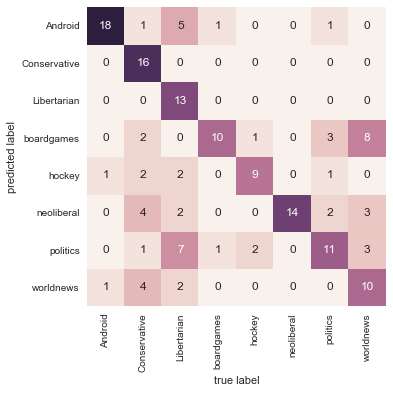

In [16]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'], 
            yticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [17]:
sample = 1000
x=0
with open('../../json_files/Android.txt', 'r') as infile:
    for line in infile:
        if(x<=sample):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Android'
        x=x+1
x=sample

with open('../../json_files/boardgames.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*2)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'boardgames'
        x=x+1
x=sample*2   

with open('../../json_files/Conservative.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*3)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Conservative'
        x=x+1
x=sample*3   

with open('../../json_files/hockey.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*4)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'hockey'
        x=x+1
x=sample*4

with open('../../json_files/Libertarian.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*5)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Libertarian'
        x=x+1
x=sample*5   

with open('../../json_files/neoliberal.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*6)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'neoliberal'
        x=x+1
x=sample*6   

with open('../../json_files/politics.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*7)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'politics'
        x=x+1
x=sample*7   

with open('../../json_files/worldnews.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*8)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'worldnews'
        x=x+1

In [18]:
y = reddit_df['subreddit']

reddit_vec = CountVectorizer(min_df=5, tokenizer=nltk.word_tokenize)
reddit_counts = reddit_vec.fit_transform(reddit_df['body'])
tfidf_transformer = TfidfTransformer()
reddit_tfidf = tfidf_transformer.fit_transform(reddit_counts)

X = reddit_tfidf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = MultinomialNB().fit(X_train, y_train)
classifier

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.75265459088069953

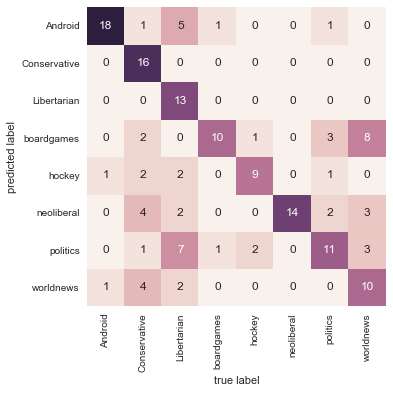

In [19]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'], 
            yticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [20]:
sample = 1500
x=0
with open('../../json_files/Android.txt', 'r') as infile:
    for line in infile:
        if(x<=sample):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Android'
        x=x+1
x=sample

with open('../../json_files/boardgames.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*2)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'boardgames'
        x=x+1
x=sample*2   

with open('../../json_files/Conservative.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*3)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Conservative'
        x=x+1
x=sample*3   

with open('../../json_files/hockey.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*4)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'hockey'
        x=x+1
x=sample*4

with open('../../json_files/Libertarian.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*5)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Libertarian'
        x=x+1
x=sample*5   

with open('../../json_files/neoliberal.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*6)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'neoliberal'
        x=x+1
x=sample*6   

with open('../../json_files/politics.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*7)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'politics'
        x=x+1
x=sample*7   

with open('../../json_files/worldnews.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*8)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'worldnews'
        x=x+1

In [21]:
y = reddit_df['subreddit']

reddit_vec = CountVectorizer(min_df=5, tokenizer=nltk.word_tokenize)
reddit_counts = reddit_vec.fit_transform(reddit_df['body'])
tfidf_transformer = TfidfTransformer()
reddit_tfidf = tfidf_transformer.fit_transform(reddit_counts)

X = reddit_tfidf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = MultinomialNB().fit(X_train, y_train)
classifier

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.70720533111203665

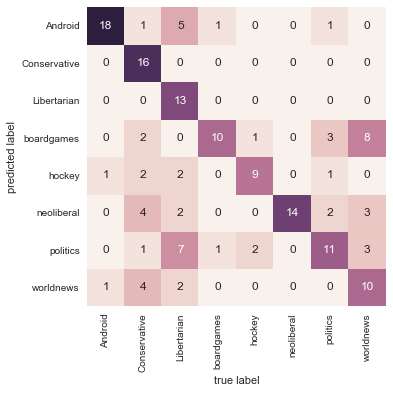

In [22]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'], 
            yticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [23]:
sample = 2000
x=0
with open('../../json_files/Android.txt', 'r') as infile:
    for line in infile:
        if(x<=sample):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Android'
        x=x+1
x=sample

with open('../../json_files/boardgames.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*2)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'boardgames'
        x=x+1
x=sample*2   

with open('../../json_files/Conservative.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*3)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Conservative'
        x=x+1
x=sample*3   

with open('../../json_files/hockey.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*4)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'hockey'
        x=x+1
x=sample*4

with open('../../json_files/Libertarian.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*5)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Libertarian'
        x=x+1
x=sample*5   

with open('../../json_files/neoliberal.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*6)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'neoliberal'
        x=x+1
x=sample*6   

with open('../../json_files/politics.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*7)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'politics'
        x=x+1
x=sample*7   

with open('../../json_files/worldnews.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*8)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'worldnews'
        x=x+1

In [24]:
y = reddit_df['subreddit']

reddit_vec = CountVectorizer(min_df=5, tokenizer=nltk.word_tokenize)
reddit_counts = reddit_vec.fit_transform(reddit_df['body'])
tfidf_transformer = TfidfTransformer()
reddit_tfidf = tfidf_transformer.fit_transform(reddit_counts)

X = reddit_tfidf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = MultinomialNB().fit(X_train, y_train)
classifier

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.71352702280537328

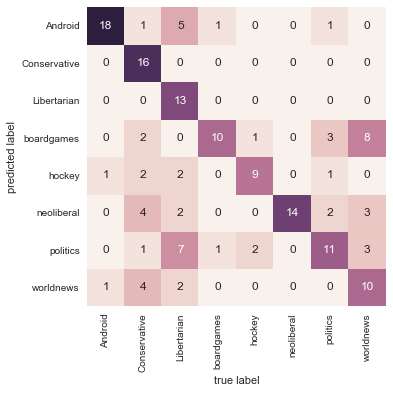

In [25]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'], 
            yticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [26]:
-

In [27]:
y = reddit_df['subreddit']

reddit_vec = CountVectorizer(min_df=5, tokenizer=nltk.word_tokenize)
reddit_counts = reddit_vec.fit_transform(reddit_df['body'])
tfidf_transformer = TfidfTransformer()
reddit_tfidf = tfidf_transformer.fit_transform(reddit_counts)

X = reddit_tfidf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = MultinomialNB().fit(X_train, y_train)
classifier

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.71082229442639344

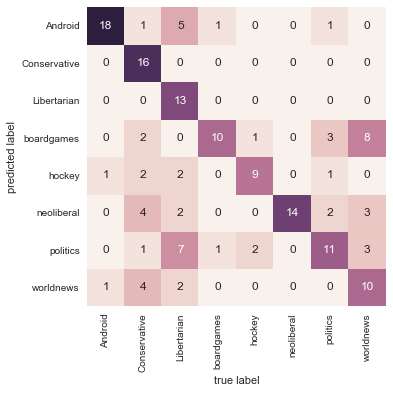

In [28]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'], 
            yticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [29]:
sample = 3000
x=0
with open('../../json_files/Android.txt', 'r') as infile:
    for line in infile:
        if(x<=sample):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Android'
        x=x+1
x=sample

with open('../../json_files/boardgames.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*2)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'boardgames'
        x=x+1
x=sample*2   

with open('../../json_files/Conservative.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*3)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Conservative'
        x=x+1
x=sample*3   

with open('../../json_files/hockey.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*4)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'hockey'
        x=x+1
x=sample*4

with open('../../json_files/Libertarian.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*5)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Libertarian'
        x=x+1
x=sample*5   

with open('../../json_files/neoliberal.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*6)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'neoliberal'
        x=x+1
x=sample*6   

with open('../../json_files/politics.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*7)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'politics'
        x=x+1
x=sample*7   

with open('../../json_files/worldnews.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*8)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'worldnews'
        x=x+1

In [30]:
y = reddit_df['subreddit']

reddit_vec = CountVectorizer(min_df=5, tokenizer=nltk.word_tokenize)
reddit_counts = reddit_vec.fit_transform(reddit_df['body'])
tfidf_transformer = TfidfTransformer()
reddit_tfidf = tfidf_transformer.fit_transform(reddit_counts)

X = reddit_tfidf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = MultinomialNB().fit(X_train, y_train)
classifier

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.70193709643824198

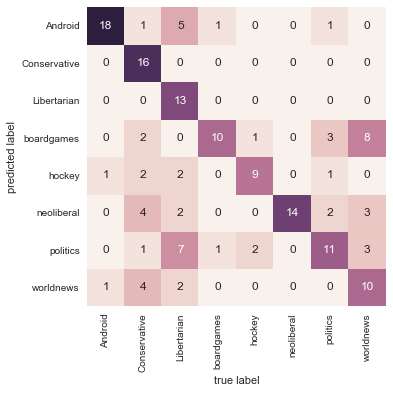

In [31]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'], 
            yticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [32]:
sample = 3500
x=0
with open('../../json_files/Android.txt', 'r') as infile:
    for line in infile:
        if(x<=sample):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Android'
        x=x+1
x=sample

with open('../../json_files/boardgames.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*2)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'boardgames'
        x=x+1
x=sample*2   

with open('../../json_files/Conservative.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*3)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Conservative'
        x=x+1
x=sample*3   

with open('../../json_files/hockey.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*4)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'hockey'
        x=x+1
x=sample*4

with open('../../json_files/Libertarian.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*5)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Libertarian'
        x=x+1
x=sample*5   

with open('../../json_files/neoliberal.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*6)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'neoliberal'
        x=x+1
x=sample*6   

with open('../../json_files/politics.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*7)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'politics'
        x=x+1
x=sample*7   

with open('../../json_files/worldnews.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*8)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'worldnews'
        x=x+1

In [33]:
y = reddit_df['subreddit']

reddit_vec = CountVectorizer(min_df=5, tokenizer=nltk.word_tokenize)
reddit_counts = reddit_vec.fit_transform(reddit_df['body'])
tfidf_transformer = TfidfTransformer()
reddit_tfidf = tfidf_transformer.fit_transform(reddit_counts)

X = reddit_tfidf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = MultinomialNB().fit(X_train, y_train)
classifier

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.71201571148009279

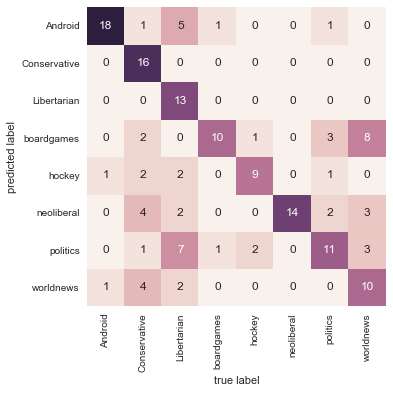

In [34]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'], 
            yticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [35]:
sample = 4000
x=0
with open('../../json_files/Android.txt', 'r') as infile:
    for line in infile:
        if(x<=sample):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Android'
        x=x+1
x=sample

with open('../../json_files/boardgames.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*2)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'boardgames'
        x=x+1
x=sample*2   

with open('../../json_files/Conservative.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*3)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Conservative'
        x=x+1
x=sample*3   

with open('../../json_files/hockey.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*4)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'hockey'
        x=x+1
x=sample*4

with open('../../json_files/Libertarian.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*5)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Libertarian'
        x=x+1
x=sample*5   

with open('../../json_files/neoliberal.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*6)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'neoliberal'
        x=x+1
x=sample*6   

with open('../../json_files/politics.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*7)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'politics'
        x=x+1
x=sample*7   

with open('../../json_files/worldnews.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*8)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'worldnews'
        x=x+1

In [36]:
y = reddit_df['subreddit']

reddit_vec = CountVectorizer(min_df=5, tokenizer=nltk.word_tokenize)
reddit_counts = reddit_vec.fit_transform(reddit_df['body'])
tfidf_transformer = TfidfTransformer()
reddit_tfidf = tfidf_transformer.fit_transform(reddit_counts)

X = reddit_tfidf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = MultinomialNB().fit(X_train, y_train)
classifier

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.70207780034369627

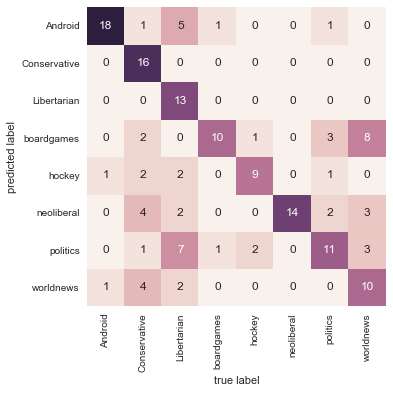

In [37]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'], 
            yticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [38]:
sample = 4500
x=0
with open('../../json_files/Android.txt', 'r') as infile:
    for line in infile:
        if(x<=sample):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Android'
        x=x+1
x=sample

with open('../../json_files/boardgames.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*2)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'boardgames'
        x=x+1
x=sample*2   

with open('../../json_files/Conservative.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*3)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Conservative'
        x=x+1
x=sample*3   

with open('../../json_files/hockey.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*4)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'hockey'
        x=x+1
x=sample*4

with open('../../json_files/Libertarian.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*5)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Libertarian'
        x=x+1
x=sample*5   

with open('../../json_files/neoliberal.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*6)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'neoliberal'
        x=x+1
x=sample*6   

with open('../../json_files/politics.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*7)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'politics'
        x=x+1
x=sample*7   

with open('../../json_files/worldnews.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*8)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'worldnews'
        x=x+1

In [39]:
y = reddit_df['subreddit']

reddit_vec = CountVectorizer(min_df=5, tokenizer=nltk.word_tokenize)
reddit_counts = reddit_vec.fit_transform(reddit_df['body'])
tfidf_transformer = TfidfTransformer()
reddit_tfidf = tfidf_transformer.fit_transform(reddit_counts)

X = reddit_tfidf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = MultinomialNB().fit(X_train, y_train)
classifier

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.70420774892376059

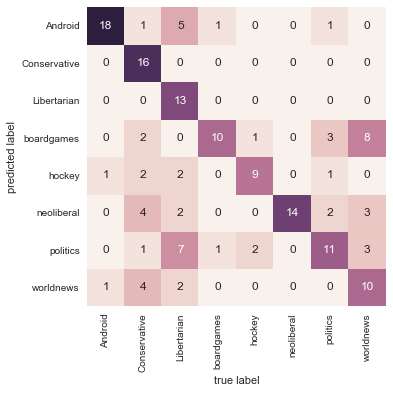

In [40]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'], 
            yticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [41]:
sample = 5000
x=0
with open('../../json_files/Android.txt', 'r') as infile:
    for line in infile:
        if(x<=sample):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Android'
        x=x+1
x=sample

with open('../../json_files/boardgames.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*2)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'boardgames'
        x=x+1
x=sample*2   

with open('../../json_files/Conservative.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*3)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Conservative'
        x=x+1
x=sample*3   

with open('../../json_files/hockey.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*4)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'hockey'
        x=x+1
x=sample*4

with open('../../json_files/Libertarian.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*5)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Libertarian'
        x=x+1
x=sample*5   

with open('../../json_files/neoliberal.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*6)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'neoliberal'
        x=x+1
x=sample*6   

with open('../../json_files/politics.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*7)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'politics'
        x=x+1
x=sample*7   

with open('../../json_files/worldnews.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*8)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'worldnews'
        x=x+1

In [42]:
y = reddit_df['subreddit']

reddit_vec = CountVectorizer(min_df=5, tokenizer=nltk.word_tokenize)
reddit_counts = reddit_vec.fit_transform(reddit_df['body'])
tfidf_transformer = TfidfTransformer()
reddit_tfidf = tfidf_transformer.fit_transform(reddit_counts)

X = reddit_tfidf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = MultinomialNB().fit(X_train, y_train)
classifier

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.69378827646544183

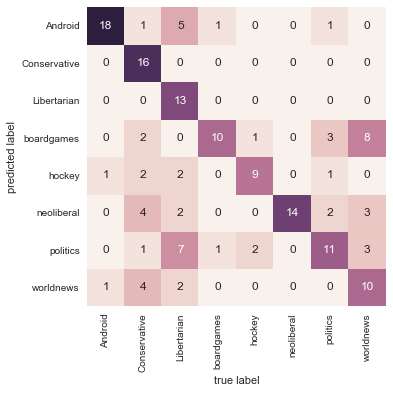

In [43]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'], 
            yticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [44]:
sample = 5500
x=0
with open('../../json_files/Android.txt', 'r') as infile:
    for line in infile:
        if(x<=sample):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Android'
        x=x+1
x=sample

with open('../../json_files/boardgames.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*2)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'boardgames'
        x=x+1
x=sample*2   

with open('../../json_files/Conservative.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*3)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Conservative'
        x=x+1
x=sample*3   

with open('../../json_files/hockey.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*4)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'hockey'
        x=x+1
x=sample*4

with open('../../json_files/Libertarian.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*5)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'Libertarian'
        x=x+1
x=sample*5   

with open('../../json_files/neoliberal.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*6)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'neoliberal'
        x=x+1
x=sample*6   

with open('../../json_files/politics.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*7)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'politics'
        x=x+1
x=sample*7   

with open('../../json_files/worldnews.txt', 'r') as infile:
    for line in infile:
        if(x<=(sample*8)):
            line_in = json.loads(line)
            reddit_df.loc[x, 'parent_id'] = line_in['parent_id']
            reddit_df.loc[x, 'author'] = line_in['author']
            reddit_df.loc[x, 'distinguished'] = line_in['distinguished']
            reddit_df.loc[x, 'body'] = line_in['body']
            reddit_df.loc[x, 'gilded'] = line_in['gilded']
            reddit_df.loc[x, 'score'] = line_in['score']
            reddit_df.loc[x, 'author_flair_css_class'] = line_in['author_flair_css_class']
            reddit_df.loc[x, 'stickied'] = line_in['stickied']
            reddit_df.loc[x, 'retrieved_on'] = line_in['retrieved_on']
            reddit_df.loc[x, 'author_flair_text'] = line_in['author_flair_text']
            reddit_df.loc[x, 'id'] = line_in['id']
            reddit_df.loc[x, 'subreddit'] = 'worldnews'
        x=x+1

In [45]:
y = reddit_df['subreddit']

reddit_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize)
reddit_counts = reddit_vec.fit_transform(reddit_df['body'])
tfidf_transformer = TfidfTransformer()
reddit_tfidf = tfidf_transformer.fit_transform(reddit_counts)

reddit_vec = CountVectorizer(min_df=5, tokenizer=nltk.word_tokenize)
reddit_counts = reddit_vec.fit_transform(reddit_df['body'])
tfidf_transformer = TfidfTransformer()
reddit_tfidf = tfidf_transformer.fit_transform(reddit_counts)

X = reddit_tfidf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = MultinomialNB().fit(X_train, y_train)
classifier

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.69469378479718213

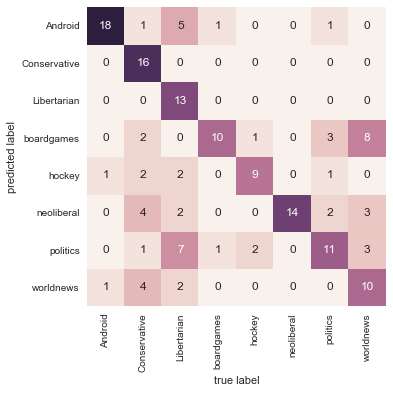

In [46]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'], 
            yticklabels=['Android','Conservative','Libertarian','boardgames','hockey','neoliberal','politics','worldnews'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()